In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import cluster
from sklearn.cluster import KMeans


In [44]:
#load data 
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [45]:
# determine the columns of data 
col = boston.feature_names
print(col)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [46]:
#showing the data
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [47]:
# determine the terget of data
target = boston.target
print(target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [48]:
#determine the unique target
uni=pd.unique(target)
print(unique)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  21.7 20.4 18.2
 19.9 23.1 17.5 20.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8 18.4 21.
 12.7 13.2 13.1 13.5 20.  24.7 30.8 34.9 26.6 25.3 21.2 19.3 14.4 19.4
 19.7 20.5 25.  23.4 35.4 31.6 23.3 18.7 16.  22.2 33.  23.5 22.  17.4
 20.9 24.2 22.8 24.1 21.4 20.8 20.3 28.  23.9 24.8 22.5 23.6 22.6 20.6
 28.4 38.7 43.8 33.2 27.5 26.5 18.6 20.1 19.5 19.8 18.8 18.5 18.3 19.2
 17.3 15.7 16.2 18.  14.3 23.  18.1 17.1 13.3 17.8 14.  13.4 11.8 13.8
 14.6 15.4 21.5 15.3 17.  41.3 24.3 27.  50.  22.7 23.8 22.3 19.1 29.4
 23.2 24.6 29.9 37.2 39.8 37.9 32.5 26.4 29.6 32.  29.8 37.  30.5 36.4
 31.1 29.1 33.3 30.3 34.6 32.9 42.3 48.5 24.4 22.4 28.1 23.7 26.7 30.1
 44.8 37.6 46.7 31.5 31.7 41.7 48.3 29.  25.1 17.6 24.5 26.2 42.8 21.9
 44.  36.  33.8 43.1 48.8 31.  36.5 30.7 43.5 20.7 21.1 25.2 35.2 32.4
 33.1 35.1 45.4 46.  32.2 28.5 37.3 27.9 28.6 36.1 28.2 16.1 22.1 19.
 32.7 31.2 17.2 16.8 10.2 10.4 10.9 11.3 12.3  8.8  7.2 10.5  7.4 11.5
 15.1  9

In [49]:
#determine the size of our data
size = boston.data.shape
print(size)

(506, 13)


In [50]:
x=boston.data
y=boston.target

In [51]:
#split data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [52]:
print('traning data:',x_train.shape)
print('test data  :',x_test.shape)
print('traning target:',y_train.shape)
print('test data:',y_test.shape)

traning data: (404, 13)
test data  : (102, 13)
traning target: (404,)
test data: (102,)


In [53]:
# dimensionality reduction on boston dataset
from sklearn import manifold
t= manifold.TSNE(n_components=2)
x_t= t.fit_transform(x_train)


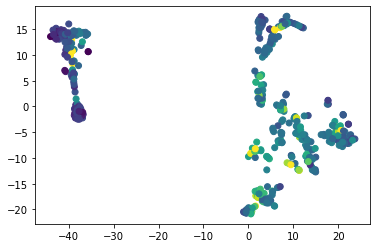

In [54]:
#showing training data 
plt.scatter(x_t[:,0],x_t[:,1],c=y_train)

In [55]:
#fit model
model = KMeans(n_clusters=238)
model.fit(x_t)
model.labels_

array([  4, 158,  89,  28,  13, 132,  97, 146,   4, 224, 105, 160, 230,
        46, 144,   8,  85, 220, 206, 203, 169,  54,  47,  16, 184,   1,
        74,  49,  33,  32, 222, 206,  45,  80,  12, 161,  91, 127, 114,
        21, 110,  69, 131, 214, 211,  69,   2,  19, 213,  97,  63,   5,
       133,  44,  43, 217,  30,  17,  73,  59, 144, 210,  53,  63,  96,
         6, 129, 141,   0,  70,  69, 198,  24, 123, 160, 226,  75, 234,
       232, 144, 212, 223, 196,  39,  98,   9,  54,  20, 163,  36,  35,
       121,  18, 108,  31,  57,  58, 159,  81, 220,  11,  16,  82,  72,
        85, 125,  30, 142, 107, 157,  82, 130,  44, 235,  47,  10,  64,
       152, 130,  27, 207, 182, 194,  14, 130,  27, 233,  15,  94, 137,
        61, 128, 153,  61, 229, 153,  35, 215, 139, 176,  86,  11,  45,
       149, 174, 114, 136, 113, 109, 148,  90, 216, 140, 124, 221,  48,
       171, 226,  53,  67, 117, 152, 184,  57, 198,  60,  48,  79,  68,
       158,  10, 230,  28,  16,  37,  21, 108, 189,  92,   9, 15

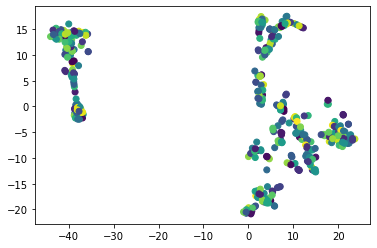

In [56]:
#visualization of the result obtain 
plt.scatter(x_t[:,0],x_t[:,1],c=model.labels_)

In [57]:
#make prediction in the test dataset
x_t_pred=t.fit_transform(x_test)
y_pred=model.predict(x_t_pred)
print(y_pred)
y_pred.shape


[173 107  78  89  78  89 107 173  54 107 107  62 107  78 107 107 107 121
 107  89  78  78 107  80 173 173  78  89 107  78 121  78  89  62  54  78
 107 173  78  89  98 107 121 121 107  62  78 107  89 107 107  78 173 107
  89  89  89  89 107 173  78  89  60  54  78  78 173  78  54 107  60  80
  62 107  78  78 173 107  89  54  78  78 173  78 168  62  89 107 107 121
  54 107 107 107 173 107 107  78  78  78  78  60]


(102,)

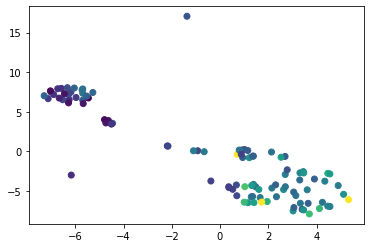

In [58]:
#visualization of the expect result
plt.scatter(x_t_pred[:,0],x_t_pred[:,1],c=y_test)

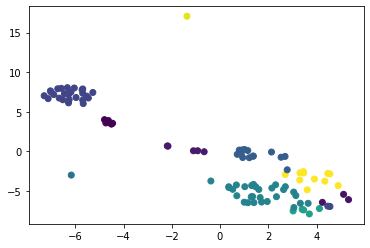

In [59]:
#visualization of the resule obtain
plt.scatter(x_t_pred[:,0],x_t_pred[:,1],c=y_pred)